# EUR-USD and EUR-RUB Exchange Rate Evolution in 2020 (the COVID Pandemic)

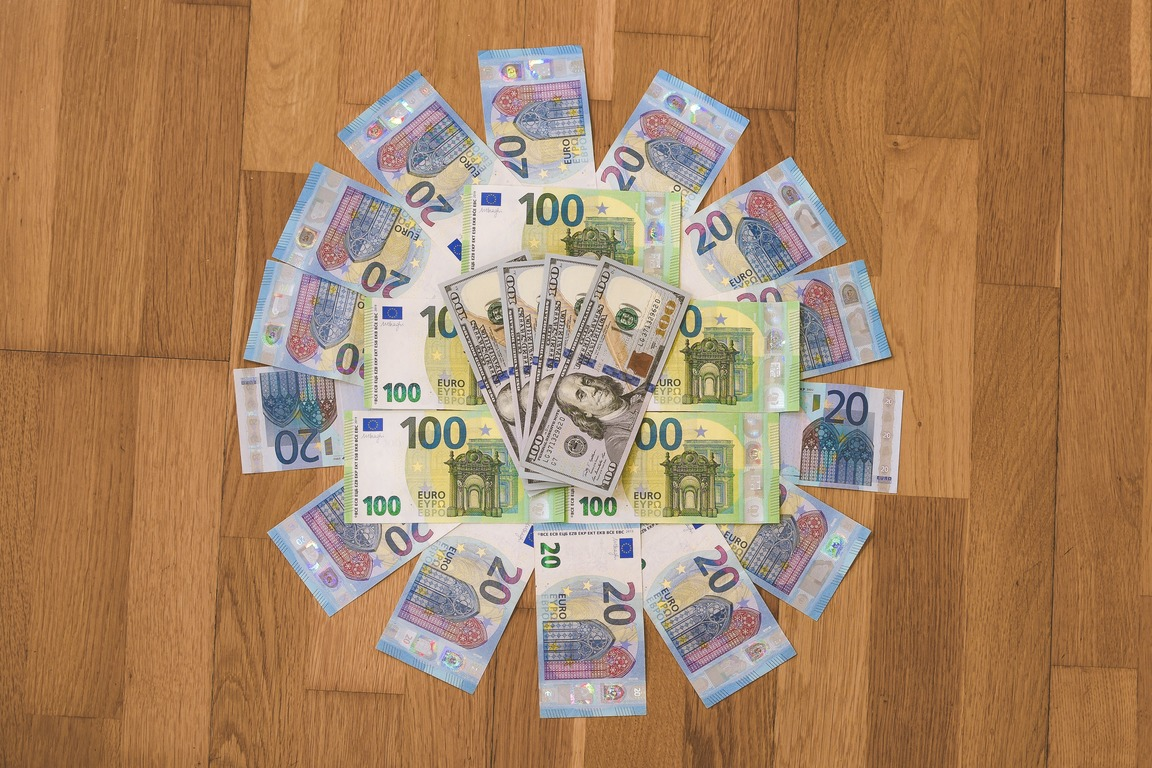

## Introduction
The goal of this project is to explore the evolution of the exchange rates between the following currencies:
- EUR-USD,
- EUR-RUB (the Russian rouble).

For each pair of currencies, we'll identify the main political and/or economical factors that influenced exchange rate dynamics during the coronavirus pandemic in 2020.

The [dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) we'll use describes the euro daily exchange rates for different currencies from 1999 till 2021. The data was gathered by Daria Chemkaeva from the European Central Bank data source.
### Summary of Results
We found out that while in the USA the COVID trends had a significant impact on the EUR-USD exchange rate resulting in its rapid and almost constant growth till the end of the year, in Russia the main factors that influenced the EUR-RUB exchange rate up to reaching its historical maximum were dramatic Urals oil price fluctuations and the international scandal related to the poisoning of Alexei Navalny. 
## Data Downloading and Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
pd.set_option('max_columns', exchange_rates.shape[1])
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,NaN,0.90333,NaN,9.5136,7.5588,360.27,17075.10,3.9277,89.8670,156.1,126.25,1335.85,NaN,NaN,NaN,24.5860,4.9293,10.4713,1.7036,59.020,4.5473,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,NaN,0.90160,NaN,9.5330,7.5565,361.32,17062.67,3.9430,89.7890,156.1,126.62,1332.03,NaN,NaN,NaN,24.3031,4.9264,10.4440,1.7065,59.058,4.5475,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
print(f'\033[1mNumber of rows:\033[0m\t\t  {exchange_rates.shape[0]:,}'
      f'\033[1m\nNumber of columns:\033[0m \t  {exchange_rates.shape[1]:,}'
      f'\n\n\033[1mMISSING DATA:\033[0m\n{round(exchange_rates.isnull().sum()*100/len(exchange_rates))}'
      f'\n\n\033[1mDATA TYPES:\033[0m\n{exchange_rates.dtypes}')

Number of rows:		  5,699
Number of columns: 	  41

MISSING DATA:
Period\Unit:                 0.0
[Australian dollar ]         0.0
[Bulgarian lev ]             7.0
[Brazilian real ]            5.0
[Canadian dollar ]           0.0
[Swiss franc ]               0.0
[Chinese yuan renminbi ]     5.0
[Cypriot pound ]            59.0
[Czech koruna ]              0.0
[Danish krone ]              0.0
[Estonian kroon ]           45.0
[UK pound sterling ]         0.0
[Greek drachma ]            91.0
[Hong Kong dollar ]          0.0
[Croatian kuna ]             5.0
[Hungarian forint ]          0.0
[Indonesian rupiah ]         0.0
[Israeli shekel ]            5.0
[Indian rupee ]              5.0
[Iceland krona ]            42.0
[Japanese yen ]              0.0
[Korean won ]                0.0
[Lithuanian litas ]         27.0
[Latvian lats ]             31.0
[Maltese lira ]             59.0
[Mexican peso ]              0.0
[Malaysian ringgit ]         0.0
[Norwegian krone ]           0.0
[New Zealan

At this point, we can make the following observations:
- There are 5,699 rows and 41 columns in the dataset. Each entry represents a working day from *4.01.1999* till *8.01.2021* inclusive. Each column, apart from the first one, represents a currency to euro rate, for 40 different currencies.
- Many columns don't have missing values at all (or, more precisely, they don't have NaN values), while some have a high percentage of them: 91% for Greek drachma, 63% for Slovenian tolar.
- 3 of 41 columns are of float type, all the others – object type. We should consider converting the first column with the dates into datetime and the others, representing numerical information, into float. 

## Data Cleaning
For the scope of our analysis, we're interested only in the columns `Period\\Unit:`, `[US dollar ]`, and `[Russian rouble ]`. Hence, we'll focus on cleaning only them:

In [4]:
# Renaming the columns
exchange_rates.rename(columns={'Period\\Unit:': 'Time',
                               '[US dollar ]': 'US_dollar',
                               '[Russian rouble ]': 'Russian_rouble'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Isolating the necessary columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_rouble = exchange_rates[['Time', 'Russian_rouble']]

# Checking the EUR-USD and EUR-RUB exchange rate values
print('\033[1m' + 'Frequency table for EUR-USD exchange rates:' + '\033[0m')
print(euro_to_dollar['US_dollar'].value_counts())
print('\n\n\033[1m' + 'Frequency table for EUR-RUB exchange rates:' + '\033[0m')
print(euro_to_rouble['Russian_rouble'].value_counts())

Frequency table for EUR-USD exchange rates:
-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
1.2034     1
1.2336     1
1.4692     1
1.1899     1
1.2610     1
Name: US_dollar, Length: 3528, dtype: int64


Frequency table for EUR-RUB exchange rates:
-          62
43.9800     4
40.6500     4
35.2250     4
39.6750     4
           ..
43.6995     1
69.1190     1
35.6728     1
40.3750     1
39.9850     1
Name: Russian_rouble, Length: 5413, dtype: int64


In both new dataframes, we have a wrong value "-" for the corresponding exchange rates, which resulted in these columns to be of a string data type. Practically, those are missing values that should be dropped. Then, we'll convert the columns to a float data type.

In [5]:
# Keeping only the valid values in both dataframes
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_rouble = euro_to_rouble[euro_to_rouble['Russian_rouble']!='-']

# Converting exchange rate columns to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

Now that we created and cleaned the dataframes for both currencies in interest, let's focus on each of them at turns.
## EUR-USD Exchange Rate Evolution
### General trend
Let's start with creating a line plot to visualize the evolution of the EUR-USD exchange rate for the whole period of time. Since we are interested in a general trend of this evolution, we'd rather see a smooth line of long-term upward and downward changes, without small wiggles due to the daily variation in the exchange rate. For these purposes, we can use the concept of the **rolling mean**, aka the [**moving average**](https://en.wikipedia.org/wiki/Moving_average). The principle behind this is that if we apply a larger **rolling window** rather than one day, we'll get a smoother line, with reduced noise. The larger the rolling window, the smoother the line. 

In our case, a reasonable rolling window is 30 days, i.e. 1 month. This approach will allow increasing the data-ink ratio without losing any important information, and, as a result, will facilitate focusing on long-term trends rather than the noise.

In [6]:
# Creating a column with smoothed values of EUR-USD exchange rates
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

Now, we'll plot 2 graphs: EUR-USD exchange rate evolution with and without smoothing, to see the difference:

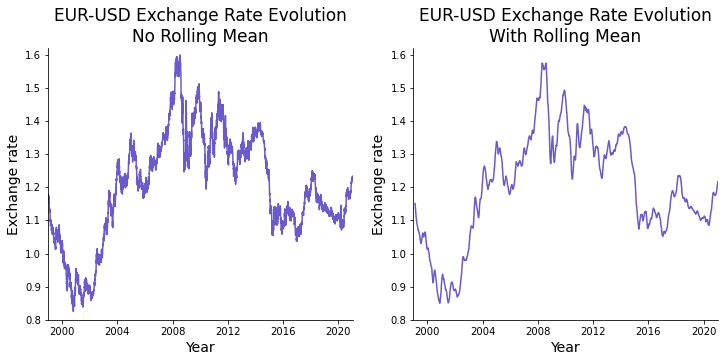

In [7]:
columns = ['US_dollar', 'rolling_mean']
titles = ['EUR-USD Exchange Rate Evolution\nNo Rolling Mean', 'EUR-USD Exchange Rate Evolution\nWith Rolling Mean']

def create_line_plot(df, title, xlabel='Month', column='rolling_mean',
                     title_font=25, label_font=20, tick_font=14,
                     x_min='1999-01-01', x_max='2021-01-08', y_min=None, y_max=None):
    plt.plot(df['Time'], df[column], color='slateblue')
    plt.title(title, fontsize=title_font)
    plt.xlabel(xlabel, fontsize=label_font)
    plt.ylabel('Exchange rate', fontsize=label_font)
    plt.xticks(fontsize=tick_font)
    plt.yticks(fontsize=tick_font)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    sns.despine()
    
plt.figure(figsize=(12,5))
for i in range(1,3):
    plt.subplot(1, 2, i)
    create_line_plot(df=euro_to_dollar, column=columns[i-1], title=titles[i-1], xlabel='Year',
                     title_font=17, label_font=14, tick_font=None,
                     y_min=0.8, y_max=1.62)

As we expected, the second graph is much easier to interpret. We can distinguish various features on it: initial decrease lasted up until 2003 and followed by a rapid increase. After a series of going up and down, we observe a clear sharp drop at the end of 2015, followed by some fluctuations at lower levels.

Obviously, over the last 22 years, a lot of events happened in the USA both at national and international scales that influenced the EUR-USD exchange rate variation. The graph above can tell us numerous stories, but the one we want to visualize and explore in this project is **how the EUR-USD rate has changed during the coronavirus pandemic**.

### Developing the Storytelling Idea
Let's start with reproducing the graph above, for now without any particular adjustments, zooming in only the period of interest (*1.12.2019-1.01.2021*) and limiting the y-axis to discern the changes in more detail:

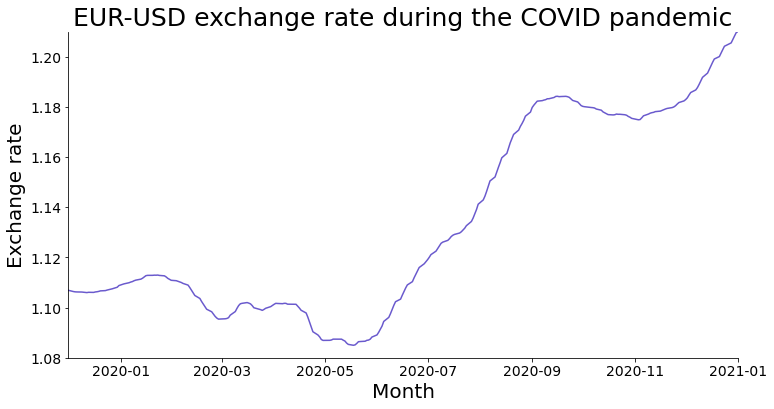

In [8]:
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_dollar, title='EUR-USD exchange rate during the COVID pandemic',
                 x_min='2019-12-01', x_max='2021-01-01', y_min=1.08, y_max=1.21)

In 2020, after some fluctuations, the EUR-USD rate was steadily increasing from the end of May, with a slight decrease and plateau at the end of September-beginning of November.

Now, let's display the graph of daily new COVID cases in the USA  in 2020, taken from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=~USA):

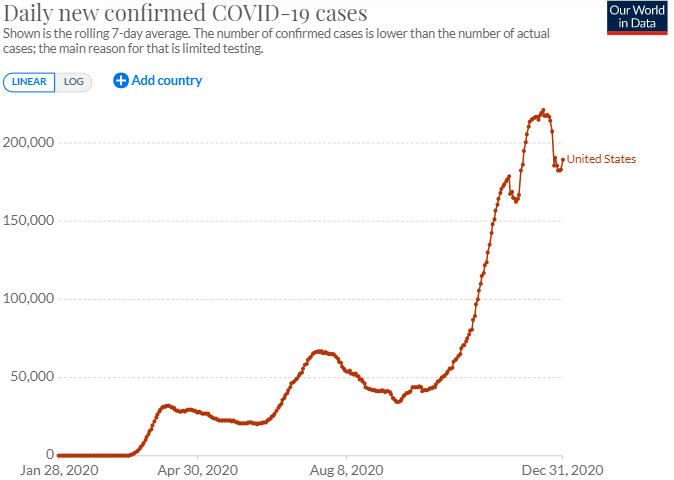

We can visually dissect this graph into several parts:
- the initial period of COVID
- 1st wave
- 1st plateau
- 2nd wave
- 2nd plateau
- 3rd wave

After taking the approximate dates from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=~USA) and some googling, we can say more about each period:
- **Initial period**: *13.01-17.03*. From the [virus arrival in the country](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_United_States) till the first serious outbreak happened. 
- **1st wave**: *18.03-13.05*. The COVID issue in the USA rapidly became grave.
- **1st plateau**: *14.05-17.06*. The situation was relatively stabilized, even though at a high average daily case number.
- **2nd wave**: *18.06-21.08*. The second wave reached a much higher magnitude of daily cases, with a peak twice higher than that of the 1st wave.
- **2nd plateau**: *22.08-10.10*. The situation was stabilized again, but at a much higher average daily case number than the previous plateau.
- **3rd wave**: *11.10-end of year*. In reality, this wave continued with some fluctuations also in 2021 and then later was followed by the 4th one. However, we don't have the data for 2021 to analyze. The magnitude of the 3rd wave was up to 4 times higher than that of the 2nd one, reaching more than 221M cases/day.

Two landmarks should be mentioned here:
- The **presidential elections** (*3.11.2020*) with subsequent disorders were something not related directly to the COVID situation. However, keeping in mind our main goal to trace the EUR-USD rate evolution in the USA in 2020, it was an important event for the country in general and had an impact on the exchange rate.
- The [**mass vaccination**](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_States) was announced at the end of December-beginning of January 2021, and daily cases started steadily decreasing till now. Unfortunately, we can't see this period on our exchange rate graph, since the data is up to *8.01.2021*, so we can't trace the effect of the vaccination program and the consequent daily case decrease on the EUR-USD rate evolution.

### Coding the Graph
Now, let's try to figure out if the COVID trends (and the presidential elections) correlate with the national currency evolution in 2020. Deciding on how to better represent our storytelling through data visualization, we should keep in mind the following things:
- A line plot seems to be a good choice here since it's familiar to a wide audience and works best when displaying time series.
- On the plot, we can show 6 COVID-related periods (excluding the vaccination start) and their corresponding rate trends as separate subplots and then combine them all in a bigger subplot.
- The presidential elections are not related to the COVID situation. Besides, this event was more pointed than lasting, including the disorders. Hence, we'd better show it on the subplot related to the third wave of COVID as an annotated point.
- Our visualization should maximize the data-ink ratio and be easily perceptible and interpretable for the audience.

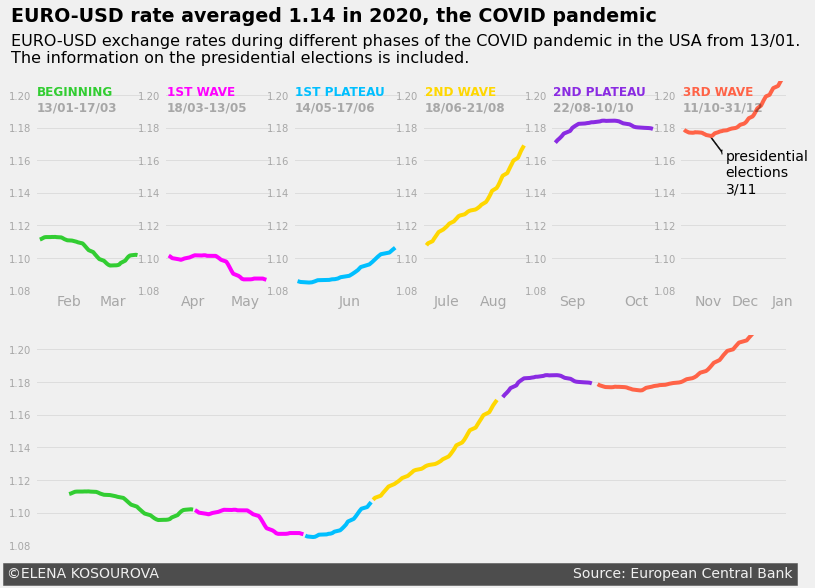

In [9]:
year_2020_usa = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year==2020)]
covid_usa = year_2020_usa.copy()[(year_2020_usa['Time'].dt.month>1)|\
                                ((year_2020_usa['Time'].dt.month==1)&(year_2020_usa['Time'].dt.day>=13))]

# Creating a dataframe for each COVID phase in the USA in 2020
beginning_usa = covid_usa.copy()[(covid_usa['Time']>='2020-01-13 00:00:00')&\
                                 (covid_usa['Time']<='2020-03-17 00:00:00')]
wave_1_usa = covid_usa.copy()[(covid_usa['Time']>='2020-03-18 00:00:00')&\
                              (covid_usa['Time']<='2020-05-13 00:00:00')]
plateau_1_usa = covid_usa.copy()[(covid_usa['Time']>='2020-05-14 00:00:00')&\
                                 (covid_usa['Time']<='2020-06-17 00:00:00')]
wave_2_usa = covid_usa.copy()[(covid_usa['Time']>='2020-06-18 00:00:00')&\
                              (covid_usa['Time']<='2020-08-21 00:00:00')]
plateau_2_usa = covid_usa.copy()[(covid_usa['Time']>='2020-08-22 00:00:00')&\
                                 (covid_usa['Time']<='2020-10-10 00:00:00')]
wave_3_usa = covid_usa.copy()[covid_usa['Time']>='2020-10-11 00:00:00']
#_________________________________________________________________

# Creating a storytelling data visualization for the EUR-USD rate evolution
# during the COVID pandemic in the USA in 2020
style.use('fivethirtyeight')

plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,6,1)
ax2 = plt.subplot(2,6,2)
ax3 = plt.subplot(2,6,3)
ax4 = plt.subplot(2,6,4)
ax5 = plt.subplot(2,6,5)
ax6 = plt.subplot(2,6,6)
ax7 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for ax in axes:
    ax.set_ylim(1.08, 1.21)
    ax.set_yticks([1.08, 1.10, 1.12, 1.14, 1.16, 1.18, 1.20])
    ax.set_yticklabels(['1.08', '1.10', '1.12', '1.14', '1.16', '1.18', '1.20'],
                       alpha=0.3, fontsize=10)
    ax.yaxis.grid(True, alpha=0.5)
    ax.xaxis.grid(False)
    
ax1.plot(beginning_usa['Time'], beginning_usa['rolling_mean'], color='limegreen')
ax1.set_xticklabels(['', '', 'Feb', '', '', '', 'Mar', '', ''], alpha=0.3)
ax1.text(18272, 1.2, 'BEGINNING', fontsize=12, weight='bold', color='limegreen')
ax1.text(18272, 1.19, '13/01-17/03', fontsize=12, weight='bold', alpha=0.3)

ax2.plot(wave_1_usa['Time'], wave_1_usa['rolling_mean'], color='magenta')
ax2.set_xticklabels(['', 'Apr', '', '', '', 'May', '', ''], alpha=0.3)
ax2.text(18338, 1.2, '1ST WAVE', fontsize=12, weight='bold', color='magenta')
ax2.text(18338, 1.19, '18/03-13/05', fontsize=12, weight='bold', alpha=0.3)

ax3.plot(plateau_1_usa['Time'], plateau_1_usa['rolling_mean'], color='deepskyblue')
ax3.set_xticklabels(['', '', '', '', '', 'Jun', '', '', '', ''], alpha=0.3)
ax3.text(18395, 1.2, '1ST PLATEAU', fontsize=12, weight='bold', color='deepskyblue')
ax3.text(18395, 1.19, '14/05-17/06', fontsize=12, weight='bold', alpha=0.3)

ax4.plot(wave_2_usa['Time'], wave_2_usa['rolling_mean'], color='gold')
ax4.set_xticklabels(['', '', 'Jule', '', '', '', 'Aug', '', '', ''], alpha=0.3)
ax4.text(18430, 1.2, '2ND WAVE', fontsize=12, weight='bold', color='gold')
ax4.text(18430, 1.19, '18/06-21/08', fontsize=12, weight='bold', alpha=0.3)

ax5.plot(plateau_2_usa['Time'], plateau_2_usa['rolling_mean'], color='blueviolet')
ax5.set_xticklabels(['', 'Sep', '', '', '', 'Oct', ''], alpha=0.3)
ax5.text(18497, 1.2, '2ND PLATEAU', fontsize=12, weight='bold', color='blueviolet')
ax5.text(18497, 1.19, '22/08-10/10', fontsize=12, weight='bold', alpha=0.3)

ax6.plot(wave_3_usa['Time'], wave_3_usa['rolling_mean'], color='tomato')
ax6.set_xticklabels(['', 'Nov', '', 'Dec', '', 'Jan'], alpha=0.3)
ax6.text(18546, 1.2, '3RD WAVE', fontsize=12, weight='bold', color='tomato')
ax6.text(18546, 1.19, '11/10-31/12', fontsize=12, weight='bold', alpha=0.3)
ax6.arrow(18568, 1.175, 10, -0.01, color='black')
ax6.annotate('presidential\nelections\n3/11', xy=(18581, 1.14))

ax7.plot(beginning_usa['Time'], beginning_usa['rolling_mean'], color='limegreen')
ax7.plot(wave_1_usa['Time'], wave_1_usa['rolling_mean'], color='magenta')
ax7.plot(plateau_1_usa['Time'], plateau_1_usa['rolling_mean'], color='deepskyblue')
ax7.plot(wave_2_usa['Time'], wave_2_usa['rolling_mean'], color='gold')
ax7.plot(plateau_2_usa['Time'], plateau_2_usa['rolling_mean'], color='blueviolet')
ax7.plot(wave_3_usa['Time'], wave_3_usa['rolling_mean'], color='tomato')
ax7.set_xticks([])

rate_avg = round(covid_usa['rolling_mean'].mean(),2)

ax1.text(18255, 1.245, f'EURO-USD rate averaged {rate_avg} in 2020, the COVID pandemic',
         fontsize=19, weight='bold')
ax1.text(18255, 1.22, '''EURO-USD exchange rates during different phases of the COVID pandemic in the USA from 13/01.
The information on the presidential elections is included.''', fontsize=16)
ax7.text(18242, 1.06, '©ELENA KOSOUROVA' + ' '*92 + 'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)
plt.show()

We observe a correlation between the COVID trends and the EUR-USD rate evolution. However, the COVID situation doesn't concern only the USA but the whole world. To interpret better the graph above, we need to take into account the coronavirus pandemic also in Europe (since we're comparing USD with EUR). In particular, it makes sense to compare the USA with Italy, Spain, France, and Germany, i.e. the European countries that suffered most of all from COVID (source: [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=USA~ITA~DEU~FRA~ESP)):

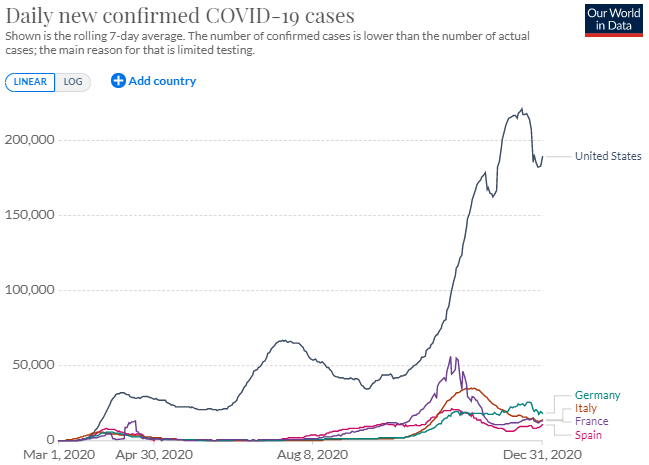

In Europe, there were mostly 2 COVID waves in 2020, roughly corresponding to the 1st and 3rd waves in the USA. The overall tendency is that the waves in Europe were always shifted, happening **much earlier than those in the USA**. In general, at the very beginning, the virus was mostly spread in China, then in Europe, especially in Italy, and the situation in the USA didn't look so serious yet. Indeed, in Italy, the first serious outbreak was registered *02.03.2020*, i.e. almost 3 weeks earlier than in the USA, while the [first lockdown](https://en.wikipedia.org/wiki/COVID-19_lockdown_in_Italy) there happened on *09.03.2020*. 

Another point to note is that in Europe, between both COVID waves in 2020, the situation always managed to improve significantly, reaching rather low numbers of confirmed daily cases (up to 200 cases per day). In the USA, instead, the coronavirus pandemic **never showed any real improvement** since its beginning. There were 2 plateaus, as we saw earlier, but both were stabilized at a very high average daily case number (more than 20,000 cases per day). 

Finally, **the scale of daily new cases in the USA was always incomparably higher** (up to 9 times in the middle of December) than in the most suffered countries of Europe. Not surprising that from the middle of May 2020, when both in Europe and the USA the situation reached a plateau (with very few daily cases in Europe and very high values in the USA), **the EUR-USD rate started constantly growing**, except for a short period from September till the beginning of November, corresponding mostly to a relative plateau (the 2nd one) in the USA, still with high numbers of daily cases, and the beginning of the second wave in Europe. In that short period, the EUR-USD exchange rate was stabilized around the value of 1.18. After that, it started growing again.

It's difficult to estimate how the elections of Joe Biden as a new president of the USA *3.11.2020* and subsequent disorders from the opposition influenced the exchange rate. On one hand, a transition from the previous president to a new one is always an important political event having an impact on the overall economical situation in the country. In addition, we observe a curve bend on the EUR-USD exchange rate plot exactly at the point corresponding to the presidential elections. However, and we can confirm it from the graphs above, the main factor that led to new sharp growth of the exchange rate was a drastic increase of daily COVID cases in the USA. The numbers considerably exceeded those in Europe, and this third big wave of COVID in the USA lasted, with some fluctuations, until the end of 2020 and continued in 2021 (from the picture above we don't see it, but we can check [*Our world in data*](https://ourworldindata.org/coronavirus/country/italy?country=USA~ITA~DEU~ESP~FRA)).

## EUR-RUB Exchange Rate Evolution
### General Trend
Now, let's switch to Russia and analyze the evolution of the EUR-RUB exchange rate. Again, we'll start with a general trend of the historical data:

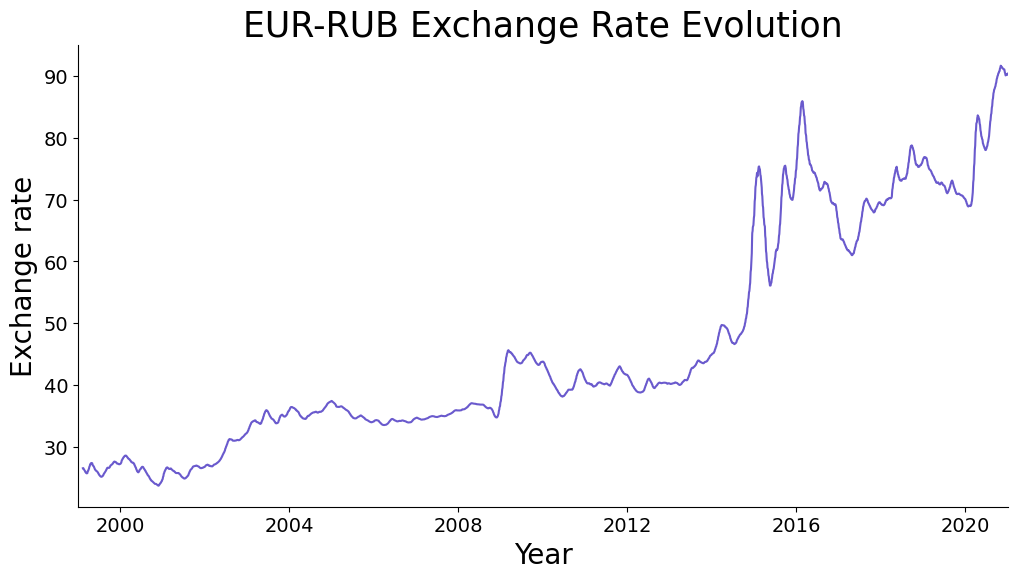

In [10]:
# Creating a column with smoothed values of EUR-RUB exchange rates
euro_to_rouble['rolling_mean'] = euro_to_rouble['Russian_rouble'].rolling(30).mean()

style.use('default')
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_rouble, title='EUR-RUB Exchange Rate Evolution', xlabel='Year')

This plot, like the one for a general trend in the USA, can tell us many stories: economical crises of 2008, 2014, 2016, and 2020, as well as many smaller events that, probably, need to be zoomed in to see them better. An overall trend is that the EUR-RUB exchange rate is globally increasing.

Also in this case, we'll focus on the following story: **how the EUR-RUB rate has changed during the coronavirus pandemic**. The first observation we can make is that it reached its historical maximum close to the end of that period, but let's now take a more granular view. 
### Developing the Storytelling Idea
Let's first reproduce the graph above zooming in only the period of interest (*1.12.2019-1.01.2021*) and limiting the y-axis:

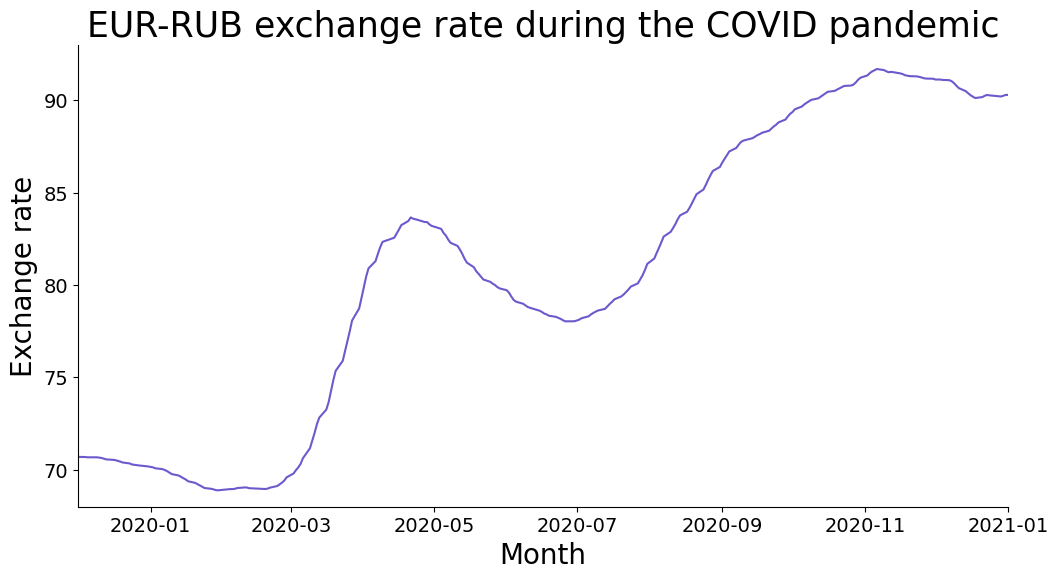

In [11]:
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_rouble, title='EUR-RUB exchange rate during the COVID pandemic',
                 x_min='2019-12-01', x_max='2021-01-01', y_min=68, y_max=93)

We can observe the following trends:
- **March-April:** in two months, the EUR-RUB rate rocketed from 69 to 84.
- **May-June:** it decreased significantly up to 78.
- **July-October:** constant growth up until 92.

Now, let's take a look at the graph of daily new COVID cases in Russia in 2020, taken from [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=~RUS):

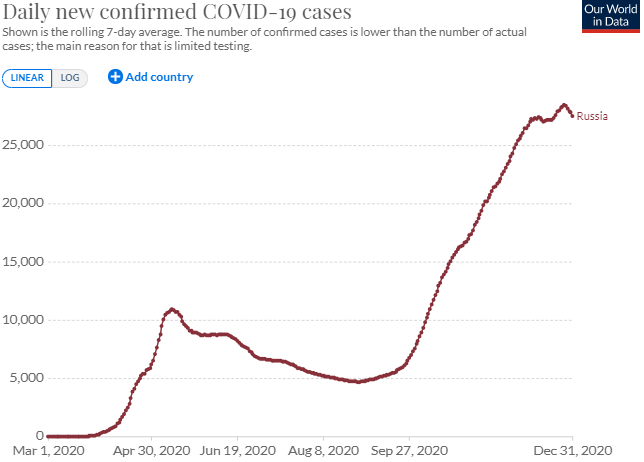

Like it happened in Europe and unlike in the USA, there were 2 COVID waves in Russia in 2020. Hence, given this graph and after some googling, the landmarks for the COVID in Russia are:
- **Initial period**: *31.01-3.04*. From the [virus arrival in the country](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Russia) till the first serious outbreak. 
- **1st wave**: *4.04-25.07*. The first outbreak started rapidly and with a big delay from both Europe and the USA.
- **Reaching a plateau**: *26.07-25.09*. The situation was relatively stabilized, with 5,000 daily cases on average.
- **2nd wave**: *26.09-end of year*. The magnitude of the second wave exceeded almost 3 times that of the first one (we observed a similar tendency for the USA and Europe). This wave continued also in 2021, but here we're interested only in the data for 2020. 
- It makes sense to skip the [vaccination start](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Russia) also in this case: even though in Russia it started earlier (*5.12.2020*), in reality, it never had a mass character. The reasons are:
    - Historically, Russian people were never particularly scared of the coronavirus. The overall psychological atmosphere in Russia in that period was much less dramatic than in the majority of the other countries.
    - Russian people generally tend not to trust Sputnik.

As for the other economical and political events of international scale that happened in Russia in 2020 and influenced the EUR-RUB exchange rate, the most important ones are the following two:
- [Urals oil](https://en.wikipedia.org/wiki/Urals_oil) price fluctuations, including a dramatic drop at the beginning of the year.
- Poisoning of [Alexei Navalny](https://en.wikipedia.org/wiki/Alexei_Navalny).

Urals oil is a reference oil brand used as a basis for the pricing of the Russian export oil mixture. Its price [dropped significantly](https://www.neste.com/investors/market-data/urals-brent-price-difference#ab6d1575) in the middle of March, and the tendency lasted up until the end of April:

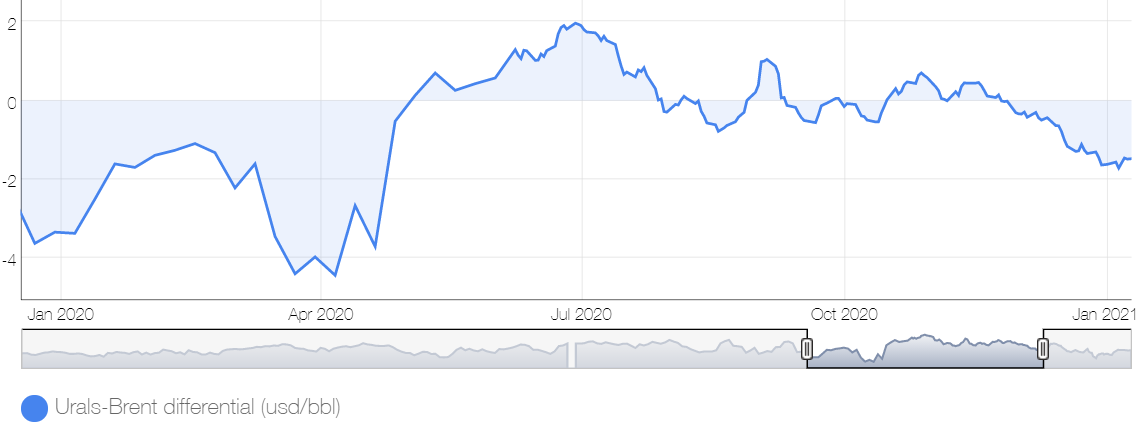

In particular, according to [Russian sources](https://ru.wikipedia.org/wiki/Март_2020_года), *18.03.2020* Urals oil price dropped to the level of prices in 2002, *27.03.2020* – 1980s. Indeed, on the graph for the *EUR-RUB exchange rate during the COVID pandemic* that we created at the beginning of this section we saw that the EUR-RUB rate rocketed from the middle of March. 

From the end of April, the oil price significantly increased and remained steadily high till December when it started dropping again.

The second event, the poisoning of Alexei Navalny (*20.08.2020*), a Russian opposition leader, led to a serious international scandal and sanctions towards Russia from many countries. We can read more about this incident in the [Wikipedia article](https://en.wikipedia.org/wiki/Poisoning_of_Alexei_Navalny), where we find also an important point for our analysis:
> The news of Navalny's poisoning caused the ruble to fall against the dollar and the euro.

Evidently, political and economical events in Russia not related directly to the COVID situation contributed a lot to the drop of the national currency. 
### Coding the Graph
To create a storytelling data visualization for Russia, we'll use the same approaches as we applied for the USA: 
- selecting a line plot,
- adding subplots for different COVID phases and a bigger subplot combining all of them,
- marking Urals oil price drop and Navalny's incident as annotated points on the corresponding subplots,
- maximizing the data-ink ratio.

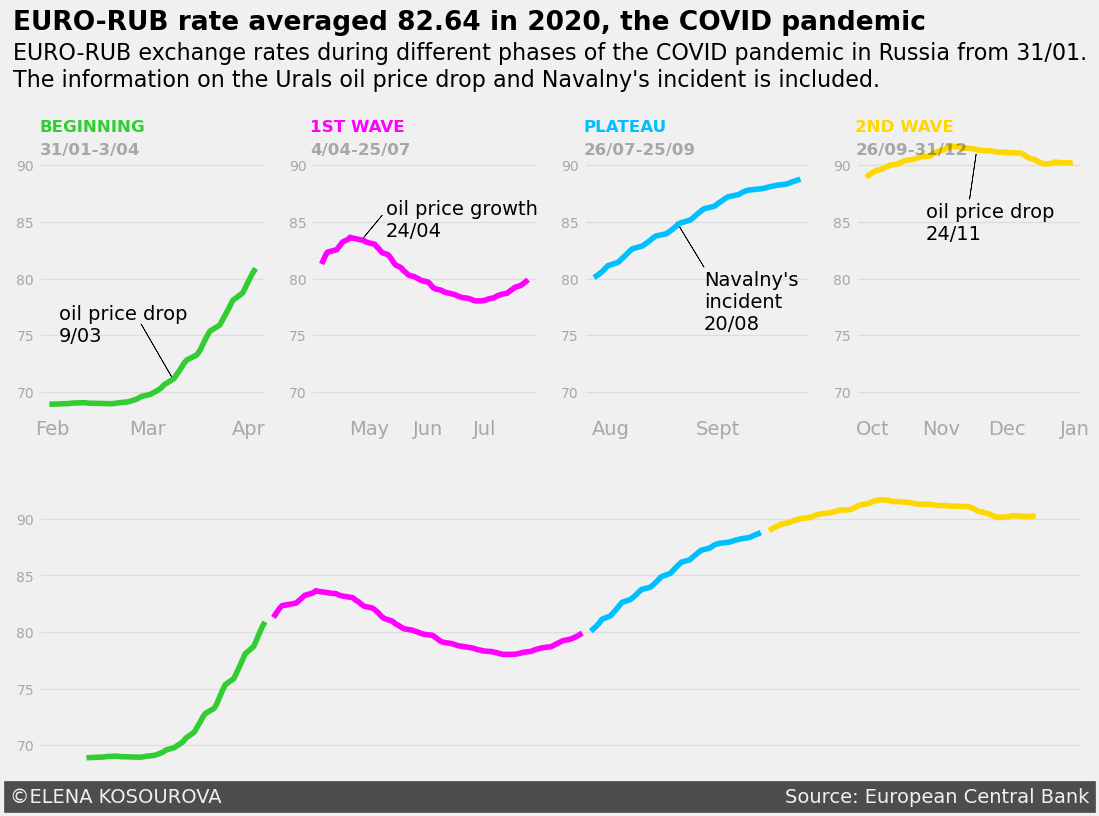

In [12]:
year_2020_rub = euro_to_rouble.copy()[(euro_to_rouble['Time'].dt.year==2020)]
covid_rus = year_2020_rub.copy()[(year_2020_rub['Time'].dt.month>1)|\
                         ((year_2020_rub['Time'].dt.month==1)&(year_2020_rub['Time'].dt.day>=31))]

# Creating a dataframe for each COVID phase in Russia in 2020
beginning_rus = covid_rus.copy()[(covid_rus['Time']>='2020-01-31 00:00:00')&\
                                 (covid_rus['Time']<='2020-04-03 00:00:00')]
wave_1_rus = covid_rus.copy()[(covid_rus['Time']>='2020-04-04 00:00:00')&\
                              (covid_rus['Time']<='2020-07-25 00:00:00')]
plateau_rus = covid_rus.copy()[(covid_rus['Time']>='2020-07-26 00:00:00')&\
                               (covid_rus['Time']<='2020-09-25 00:00:00')]
wave_2_rus = covid_rus.copy()[covid_rus['Time']>='2020-09-26 00:00:00']
#_________________________________________________________________

# Creating a storytelling data visualization for the EUR-RUB rate evolution
# during the COVID pandemic in Russia in 2020
style.use('fivethirtyeight')

plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_ylim(68, 94)
    ax.set_yticks([70,75,80,85,90])
    ax.set_yticklabels(['70','75','80','85','90'], alpha=0.3, fontsize=10)
    ax.yaxis.grid(True, alpha=0.5)
    ax.xaxis.grid(False)
    
ax1.plot(beginning_rus['Time'], beginning_rus['rolling_mean'], color='limegreen')
ax1.set_xticklabels(['Feb', '', '', '', 'Mar', '', '', '', 'Apr'], alpha=0.3)
ax1.text(18289, 93, 'BEGINNING', fontsize=12, weight='bold', color='limegreen')
ax1.text(18289, 91, '31/01-3/04', fontsize=12, weight='bold', alpha=0.3)
ax1.arrow(18330, 71, -10, 5, color='black')
ax1.annotate('oil price drop\n9/03', xy=(18295, 74.5))

ax2.plot(wave_1_rus['Time'], wave_1_rus['rolling_mean'], color='magenta')
ax2.set_xticklabels(['', '', 'May', '', 'Jun', '', 'Jul', ''], alpha=0.3)
ax2.text(18352, 93, '1ST WAVE', fontsize=12, weight='bold', color='magenta')
ax2.text(18352, 91, '4/04-25/07', fontsize=12, weight='bold', alpha=0.3)
ax2.arrow(18380, 83.6, 10, 2, color='black')
ax2.annotate('oil price growth\n24/04', xy=(18392, 83.7))

ax3.plot(plateau_rus['Time'], plateau_rus['rolling_mean'], color='deepskyblue')
ax3.set_xticklabels(['Aug', '', '', '', 'Sept', '', '', ''], alpha=0.3)
ax3.text(18467, 93, 'PLATEAU', fontsize=12, weight='bold', color='deepskyblue')
ax3.text(18467, 91, '26/07-25/09', fontsize=12, weight='bold', alpha=0.3)
ax3.arrow(18494, 85, 8, -4, color='black')
ax3.annotate("Navalny's\nincident\n20/08", xy=(18502, 75.5))

ax4.plot(wave_2_rus['Time'], wave_2_rus['rolling_mean'], color='gold')
ax4.set_xticklabels(['Oct', '', 'Nov', '', 'Dec', '', 'Jan'], alpha=0.3)
ax4.text(18528, 93, '2ND WAVE', fontsize=12, weight='bold', color='gold')
ax4.text(18528, 91, '26/09-31/12', fontsize=12, weight='bold', alpha=0.3)
ax4.arrow(18580, 87, 3, 4, color='black')
ax4.annotate('oil price drop\n24/11', xy=(18560, 83.5))

ax5.plot(beginning_rus['Time'], beginning_rus['rolling_mean'], color='limegreen')
ax5.plot(wave_1_rus['Time'], wave_1_rus['rolling_mean'], color='magenta')
ax5.plot(plateau_rus['Time'], plateau_rus['rolling_mean'], color='deepskyblue')
ax5.plot(wave_2_rus['Time'], wave_2_rus['rolling_mean'], color='gold')
ax5.set_xticks([])

rate_avg_rus = round(covid_rus['rolling_mean'].mean(),2)

ax1.text(18281, 102, f'EURO-RUB rate averaged {rate_avg_rus} in 2020, the COVID pandemic',
         fontsize=19, weight='bold')
ax1.text(18281, 97, '''EURO-RUB exchange rates during different phases of the COVID pandemic in Russia from 31/01.
The information on the Urals oil price drop and Navalny's incident is included.''', fontsize=16)
ax5.text(18265, 65, '©ELENA KOSOUROVA' + ' '*92 + 'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)
plt.show()

If for the USA we saw a clear correlation between the COVID trends and the EUR-USD rate evolution, here for Russia, unexpectedly, we observe almost an opposite trend: the initial period and the plateau show the national currency dropping with respect to the euro, while during the COVID outbreaks the rouble increased or at least remained relatively stabilized. On the other hand, considerable and rapid fluctuations of the Urals oil price had an evident and expected impact on the EUR-RUB exchange rate. 

To get more insights, let's look at the COVID situation in Russia and Europe together. In particular, to keep the graph cleaner and more readable, we'll consider only Italy and France as the European countries that suffered most of all from COVID (source: [Our world in data](https://ourworldindata.org/coronavirus/country/italy?country=RUS~FRA~ITA)):

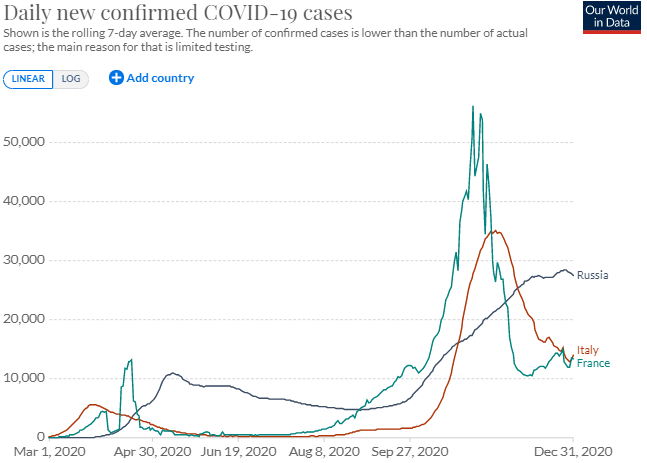

Now we can make a couple of interesting observations about the plateau phase (*26.07-25.09*)): 
- The first half of this period, till the end of August, there were much more daily cases in Russia than in Europe.
- From the end of August, the second COVID wave started in Europe. The numbers of daily cases in Europe (France, Spain) quickly started exceeding those in Russia. However, at the same time, the poisoning of Navalny happened that resulted in the rouble dropping again. 

Hence, despite the number of daily cases reached a plateau in that period the EUR-RUB rate continued growing for one reason or another.

As for the second COVID wave in Russia, it's necessary to notice that simultaneously Europe was suffering from its second wave too, and of much higher magnitude than the one in Russia. As a result, the growth of the EUR-RUB rate was slowed down almost reaching its plateau.

The trend for December looks somewhat surprising: the numbers of daily cases in Russia start exceeding those in Europe and at the same time the Urals oil price starts dropping again. We would expect the EUR-RUB rate to increase more rapidly in that period. Instead, we observe just the opposite: the rouble starts slightly growing. Exploring this non-straightforward tendency in more detail and coming up with a possible reason (considering other political and economical events both in Russia and in Europe) could be a potential way forward for this project.
## Conclusion
In this project, we explored the evolution of the EUR-USD and EUR-RUB rates during the coronavirus pandemic in 2020 and identified the main political and economical factors that influenced their dynamics. Below are our main insights:
- **The USA.** The COVID trends had a significant impact on the EUR-USD exchange rate which was constantly and rapidly growing from the middle of May, with a slight short decrease and plateau in autumn. In comparison to the most suffered European countries, the USA had more COVID waves, of much higher magnitude, and the situation never showed any real improvement since its beginning. It's difficult to estimate the impact of the presidential elections in November on the exchange rate dynamics, but it doesn’t seem to be a major factor.
- **Russia.** The EUR-RUB exchange rate reached its historical maximum close to the end of 2020. However, unlike the USA, it was mostly influenced not by the COVID trends themselves but by dramatic Urals oil price fluctuations and the international scandal related to the poisoning of Alexei Navalny. Besides, the COVID situation in Russia was never as critical as in Europe.

As for the vaccination program in both countries, given the data only up to 2021, we can’t trace its effect on the exchange rates yet since it started at the end of 2020. Also, in Russia, it never had a mass character. 

A potential way forward could be exploring in more detail an unexpected behavior of the EUR-RUB exchange rate in December: the numbers of daily cases in Russia started exceeding those in Europe and simultaneously the Urals oil price started dropping again, but at the same time, a slight growth of the rouble is observed.